In [1]:
#Funcoes que implementam o algoritmo de regularizacao, de Tikhonov de ordem zero e Variacao total.                                                     %
#Autor: Joao Pedro Reis                                                                                                                            
#Data: 29/06/2023                                                                                 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

In [3]:
def IRLS_Inv(trace, G, alphaL1, alphaL2,thresold,niter):
    residuo_iter = np.zeros(10)
    dim = len(trace)
    R = np.eye(dim)
    I = np.eye(dim)
    G_T = G.transpose()
    count = 0 
    #Tikhonov ordem zero:
    M1_L2 = np.linalg.inv( np.matmul(G_T, G) + (alphaL2*I) )
    M2_L2 = np.matmul(G_T, trace)
    RegL2 = np.matmul(M1_L2, M2_L2)
    
    #Inversao do traco sismico utilizando regularizacao de tikhonov a partir da norma1 nos residuos dos dados
    while (count < niter):
            Gt_R = np.matmul(G_T, R)
            M1_L1 = np.linalg.inv( np.matmul(Gt_R,G) + (alphaL1*I) )
            M2_L1 = np.matmul(Gt_R, trace)
            RegL1 = np.matmul(M1_L1, M2_L1)
            dcalc = np.matmul(G, RegL1)
            residuo = dcalc[:] - trace[:]
            print('Numero de iteracoes ',count+1)
            for i in range( (dim//2)+2 ):
                if abs(residuo[i]) >= thresold:
                    R[i,i] = 1/abs(residuo[i])
                else:
                    R[i,i] = 1/thresold
            for i in range(dim):
                if abs(RegL1[i]) >= thresold:
                    I[i,i] = 1/abs(RegL1[i])
                else:
                    I[i,i] = 1/thresold
            residuo_iter[count] = residuo[145]
            count = count + 1
    return RegL2, RegL1, residuo_iter

def Ricker_Wavelet(Peak_freq, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate( (np.flipud(-t[1:]), t), axis=0)
    ricker = (1. -2.*(np.pi**2)*(Peak_freq**2)*(t**2))*np.exp(-(np.pi**2)*(Peak_freq**2)*(t**2))
    return t, ricker

In [4]:
t, ricker = Ricker_Wavelet(30,101,4)

Refl = np.zeros(521)
Refl[100] = 0.2
Refl[230] = -0.15
Refl[340] = 0.05
Refl[270] = -0.08
Refl[145] = 0.1

n = len(Refl)
m = len(ricker)

np.random.seed(1)
noise = np.random.normal(0,1,n)*0.5

In [5]:
Refl_T = Refl.reshape(n,1)
ricker_padded = np.append(ricker,np.zeros((1,2*n-m)))

In [6]:
G = toeplitz(400*ricker_padded, np.zeros((1,n)))
G = G[m//2+1:n+(m//2)+1,:]

In [7]:
trace = np.matmul(G, Refl_T)

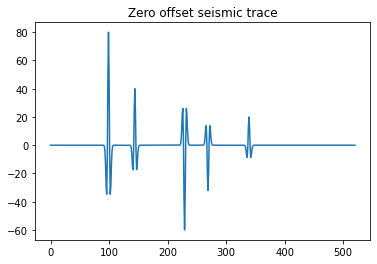

In [8]:
plt.title("Zero offset seismic trace")
plt.plot(trace)

In [9]:
alphaL1 = 10
alphaL2 = 100
thresold = 0.0001
niter = 10

In [10]:
RegL2, RegL1, residuo = IRLS_Inv(trace, G, alphaL1, alphaL2,thresold,niter)

RegL1n = RegL1[:]/max(abs(RegL1[:]))*max(abs(Refl[:]));
RegL2n = RegL2[:]/max(abs(RegL2[:]))*max(abs(Refl[:]));

Numero de iteracoes  1
Numero de iteracoes  2
Numero de iteracoes  3
Numero de iteracoes  4
Numero de iteracoes  5
Numero de iteracoes  6
Numero de iteracoes  7
Numero de iteracoes  8
Numero de iteracoes  9
Numero de iteracoes  10


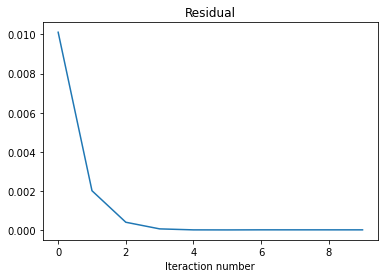

In [11]:
plt.title("Residual")
plt.xlabel("Iteraction number")
plt.plot(abs(residuo))

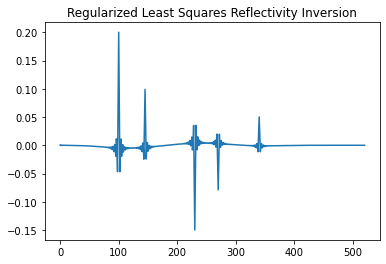

In [12]:
plt.title("Regularized Least Squares Reflectivity Inversion")
plt.plot(RegL2n)

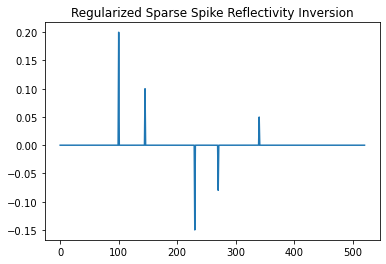

In [13]:
plt.title("Regularized Sparse Spike Reflectivity Inversion")
plt.plot(RegL1n)

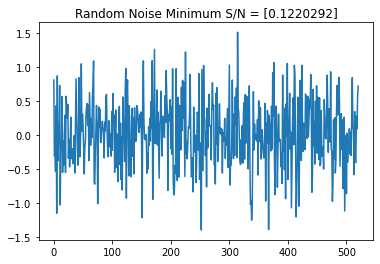

In [14]:
#generating noisy trace with low gaussian random noise average ~10 times smaller than smaller reflectivity impulse
noise = noise.reshape(n,1)
trace_noise = trace + noise

Sn = max(noise)/trace[340]
plt.title('Random Noise'  ' Minimum S/N = '+str(Sn))
plt.plot(noise)

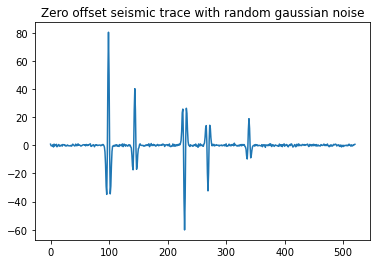

In [15]:
plt.title("Zero offset seismic trace with random gaussian noise")
plt.plot(trace_noise)

In [16]:
RegL2_noise, RegL1_noise, residuo = IRLS_Inv(trace_noise, G, alphaL1, alphaL2,thresold,niter)

RegL1n_noise = RegL1_noise[:]/max(abs(RegL1_noise[:]))*max(abs(Refl[:]));
RegL2n_noise = RegL2_noise[:]/max(abs(RegL2_noise[:]))*max(abs(Refl[:]));

Numero de iteracoes  1
Numero de iteracoes  2
Numero de iteracoes  3
Numero de iteracoes  4
Numero de iteracoes  5
Numero de iteracoes  6
Numero de iteracoes  7
Numero de iteracoes  8
Numero de iteracoes  9
Numero de iteracoes  10


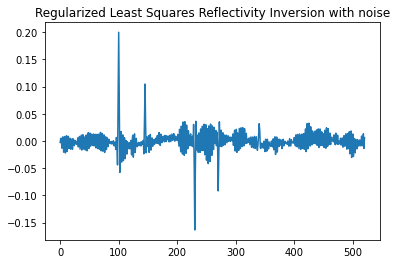

In [17]:
plt.title("Regularized Least Squares Reflectivity Inversion with noise")
plt.plot(RegL2n_noise)

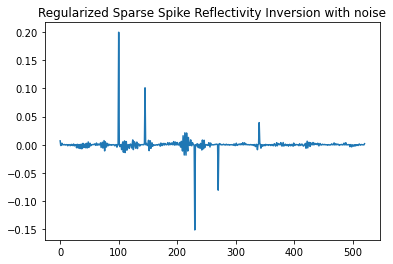

In [18]:
plt.title("Regularized Sparse Spike Reflectivity Inversion with noise")
plt.plot(RegL1n_noise)

In [19]:
#Now let's investigate how the regularization parameter alpha controls de inversion
alphaL1 = 3000 #Big value will be used this time instead of small
alphaL2 = 100
thresold = 0.0001
niter = 10

In [20]:
RegL2, RegL1_new_reg, residuo = IRLS_Inv(trace, G, alphaL1, alphaL2,thresold,niter)

RegL1n_new = RegL1_new_reg[:]/max(abs(RegL1_new_reg[:]))*max(abs(Refl[:]));

Numero de iteracoes  1
Numero de iteracoes  2
Numero de iteracoes  3
Numero de iteracoes  4
Numero de iteracoes  5
Numero de iteracoes  6
Numero de iteracoes  7
Numero de iteracoes  8
Numero de iteracoes  9
Numero de iteracoes  10


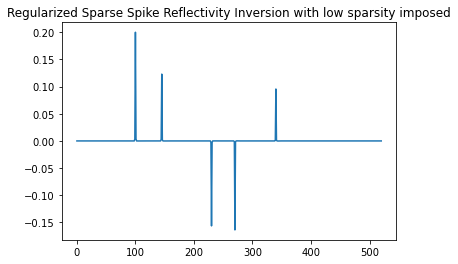

In [21]:
plt.title("Regularized Sparse Spike Reflectivity Inversion with low sparsity imposed")
plt.plot(RegL1n_new)